# Caso

"Frutas Tropicales S.A.", una prominente empresa ecuatoriana en la industria del banano, se enfrenta a un desafío crítico en su cadena de suministro. Con seis fincas ubicadas estratégicamente en las provincias de El Oro, Guayas y Los Ríos, la empresa busca optimizar la distribución de sus productos a los principales puertos de exportación del país. Dada su experiencia y conocimientos en logística y programación lineal, "Frutas Tropicales S.A." le ha contratado como consultor para desarrollar un modelo que minimice los costos totales de transporte, manteniendo al mismo tiempo la eficiencia y la capacidad de respuesta a la demanda del mercado internacional.

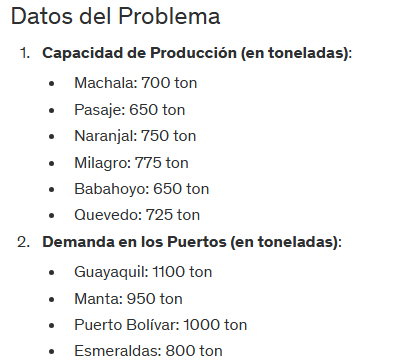

image.png

Costos = {

('Machala', 'Guayaquil'): 38.0,

('Machala', 'Manta'): 58.0,

('Machala', 'Puerto Bolívar'): 24.0,

('Machala', 'Esmeraldas'): 84.0,

('Pasaje', 'Guayaquil'): 36.0,

('Pasaje', 'Manta'): 56.0,

('Pasaje', 'Puerto Bolívar'): 22.0,

('Pasaje', 'Esmeraldas'): 82.0,

('Naranjal', 'Guayaquil'): 12.0,

('Naranjal', 'Manta'): 32.0,

('Naranjal', 'Puerto Bolívar'): 30.0,

('Naranjal', 'Esmeraldas'): 60.0,

('Milagro', 'Guayaquil'): 8.0,

('Milagro', 'Manta'): 28.0,

('Milagro', 'Puerto Bolívar'): 26.0,

('Milagro', 'Esmeraldas'): 56.0,

('Babahoyo', 'Guayaquil'): 14.0,

('Babahoyo', 'Manta'): 34.0,

('Babahoyo', 'Puerto Bolívar'): 32.0,

('Babahoyo', 'Esmeraldas'): 62.0,

('Quevedo', 'Guayaquil'): 34.0,

('Quevedo', 'Manta'): 54.0,

('Quevedo', 'Puerto Bolívar'): 52.0,

('Quevedo', 'Esmeraldas'): 72.0

}

# Paquetes

In [1]:
!pip install -q pyomo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.5 MB/s eta 0:00:00


In [2]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [25]:
import pandas as pd
import numpy as np
import pyomo.environ as pyo

# diccionarios con datos del problema

In [26]:
# Capacidad de prod en TON
capacidad_prod = {
  'Machala': 700,
  'Pasaje': 650,
  'Naranjal': 750,
  'Milagro': 775,
  'Babahoyo': 650,
  'Quevedo': 725
}

# demanda de cada puerto (TON)
demanda = {
  'Guayaquil': 1100,
  'Manta': 950,
  'Puerto Bolívar': 1000,
  'Esmeraldas': 800
}

# Costos de Transporte (USD por tonelada):
costos = {

('Machala', 'Guayaquil'): 38.0,

('Machala', 'Manta'): 58.0,

('Machala', 'Puerto Bolívar'): 24.0,

('Machala', 'Esmeraldas'): 84.0,

('Pasaje', 'Guayaquil'): 36.0,

('Pasaje', 'Manta'): 56.0,

('Pasaje', 'Puerto Bolívar'): 22.0,

('Pasaje', 'Esmeraldas'): 82.0,

('Naranjal', 'Guayaquil'): 12.0,

('Naranjal', 'Manta'): 32.0,

('Naranjal', 'Puerto Bolívar'): 30.0,

('Naranjal', 'Esmeraldas'): 60.0,

('Milagro', 'Guayaquil'): 8.0,

('Milagro', 'Manta'): 28.0,

('Milagro', 'Puerto Bolívar'): 26.0,

('Milagro', 'Esmeraldas'): 56.0,

('Babahoyo', 'Guayaquil'): 14.0,

('Babahoyo', 'Manta'): 34.0,

('Babahoyo', 'Puerto Bolívar'): 32.0,

('Babahoyo', 'Esmeraldas'): 62.0,

('Quevedo', 'Guayaquil'): 34.0,

('Quevedo', 'Manta'): 54.0,

('Quevedo', 'Puerto Bolívar'): 52.0,

('Quevedo', 'Esmeraldas'): 72.0

}

# Variables de decision

In [27]:
modelo = pyo.ConcreteModel()
modelo.dual = pyo.Suffix(direction = pyo.Suffix.IMPORT)

In [28]:
fincas = list(capacidad_prod.keys())
puertos = list(demanda.keys())

display(fincas, puertos)

['Machala', 'Pasaje', 'Naranjal', 'Milagro', 'Babahoyo', 'Quevedo']

['Guayaquil', 'Manta', 'Puerto Bolívar', 'Esmeraldas']

In [29]:
# xij: (i) es la finca y (j) son las TON que se envian al puerto
modelo.x = pyo.Var(capacidad_prod , puertos, domain = pyo.NonNegativeIntegers)

# Restricción de producción máxima

In [30]:
modelo.max_prod = pyo.ConstraintList()

for i in fincas:
    modelo.max_prod.add(
       sum(modelo.x[i,j] for j in puertos) <= capacidad_prod [i]
    )


# Restricción para satisfacer la demanda

In [31]:
for j in puertos:
    modelo.max_prod.add(
       sum(modelo.x[i,j] for i in fincas) == demanda[j]
    )

# FO

In [32]:
fo_costos =  []

for i in fincas:
  for j in puertos:
    fo_costos.append(
        modelo.x[i,j]*costos[i,j]
    )

modelo.objetivo = pyo.Objective(
    expr = sum(fo_costos),
    sense = pyo.minimize
)

In [33]:
solucion = pyo.SolverFactory('glpk').solve(modelo)

In [34]:
solucion.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 120600.0
  Upper bound: 120600.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 24
  Number of nonzeros: 48
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.019274234771728516
# ----------------------------------------------------------
#   Solution Information
# ---------------------------

In [36]:
resultados = {
    'Finca':[],
    'Puerto':[],
    'Ton':[]
}
print(f"Costo Total de transporte ${modelo.objetivo ():,.0f} pesos USDs\n")
print("Con los siguientes envíos de pallets:")
for i in fincas:
    for j in puertos:
        if modelo.x[i,j]() >= 0:
            print(f"La finca {i} exporta desde el puerto {j}: {modelo.x[i,j]():,.0f} Toneladas de banano")

            resultados['Finca'].append(i)
            resultados['Puerto'].append(j)
            resultados['Ton'].append(modelo.x[i,j]())

resultados = pd.DataFrame(resultados )

Costo Total de transporte $120,600 pesos USDs

Con los siguientes envíos de pallets:
La finca Machala exporta desde el puerto Guayaquil: 0 Toneladas de banano
La finca Machala exporta desde el puerto Manta: 0 Toneladas de banano
La finca Machala exporta desde el puerto Puerto Bolívar: 350 Toneladas de banano
La finca Machala exporta desde el puerto Esmeraldas: 0 Toneladas de banano
La finca Pasaje exporta desde el puerto Guayaquil: 0 Toneladas de banano
La finca Pasaje exporta desde el puerto Manta: 0 Toneladas de banano
La finca Pasaje exporta desde el puerto Puerto Bolívar: 650 Toneladas de banano
La finca Pasaje exporta desde el puerto Esmeraldas: 0 Toneladas de banano
La finca Naranjal exporta desde el puerto Guayaquil: 450 Toneladas de banano
La finca Naranjal exporta desde el puerto Manta: 175 Toneladas de banano
La finca Naranjal exporta desde el puerto Puerto Bolívar: 0 Toneladas de banano
La finca Naranjal exporta desde el puerto Esmeraldas: 125 Toneladas de banano
La finca Mi